# Accuracy and fairness of college success prediction

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
from src import load_clean_data, create_features, run_model, visualize_results
from src.utils import load_yaml

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
# configure directories
ROOT_DIR = load_yaml('./config/.config')['ROOT_DIR']
DATA_DIR = load_yaml('./config/.config')['DATA_DIR']

## Load and clean data

In [ ]:
data_config = os.path.join(ROOT_DIR, 'config/data_config.yaml')
load_clean_data.run(DATA_DIR, os.path.join(ROOT_DIR, 'data/01_Semantic'), data_config)

## Generate features

In [ ]:
feature_config = os.path.join(ROOT_DIR, 'config/feature_config.yaml')
create_features.run(os.path.join(ROOT_DIR, 'data/01_Semantic'), os.path.join(ROOT_DIR, 'data/02_Features'), feature_config)

## Run predictive models

In [14]:
model_config = os.path.join(ROOT_DIR, 'config/model_config.yaml')
run_model.run(os.path.join(ROOT_DIR, 'data/02_Features'),
              os.path.join(ROOT_DIR, 'data/03_Models'),
              os.path.join(ROOT_DIR, 'data/04_Results'),
              model_config)

Prediction bias analysis saved to HDFStore
Prediction bias analysis saved to D:/Google Drive/RY_UCI/Academics/IVLE/Meta/Meta-IVLE\data/04_Results\pred_bias.csv


## Visualize

Matrix of prediction bias saved to D:/Google Drive/RY_UCI/Academics/IVLE/Meta/Meta-IVLE\data/04_Results\pred_bias_mat.csv
Plot of prediction bias saved to D:/Google Drive/RY_UCI/Academics/IVLE/Meta/Meta-IVLE\plots\pred_bias_cur_course_over_median.png
Plot of prediction bias saved to D:/Google Drive/RY_UCI/Academics/IVLE/Meta/Meta-IVLE\plots\pred_bias_next_year_over_median.png


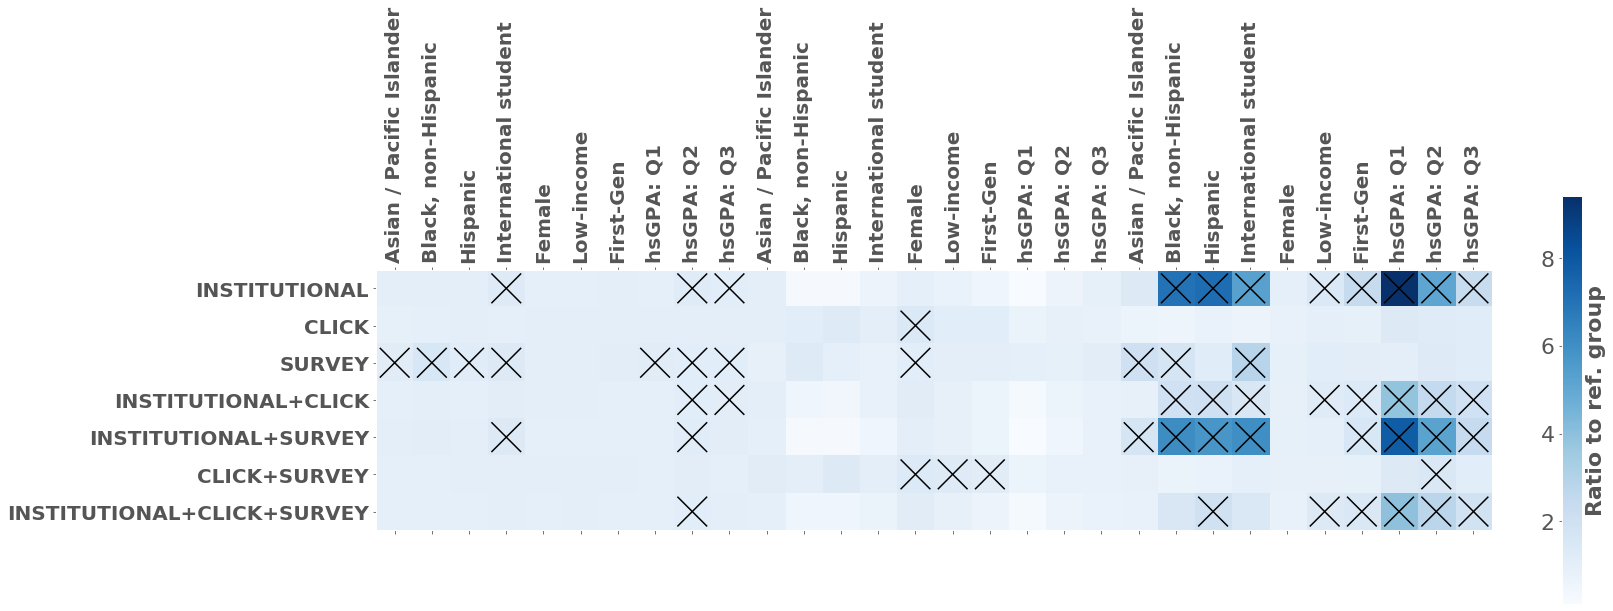

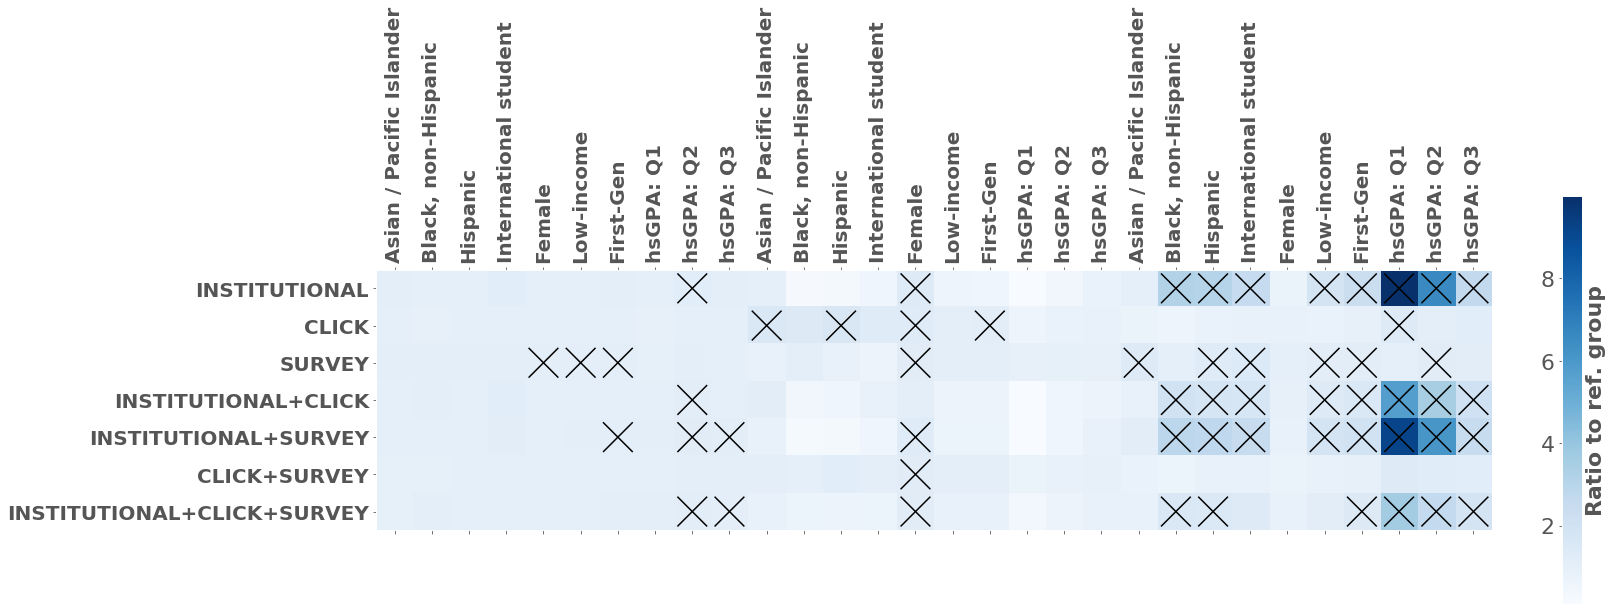

In [103]:
vis_config = os.path.join(ROOT_DIR, 'config/vis_config.yaml')
visualize_results.run(os.path.join(ROOT_DIR, 'data/04_Results'), os.path.join(ROOT_DIR, 'plots'), vis_config)

In [70]:
with pd.HDFStore(os.path.join(os.path.join(ROOT_DIR, 'data/04_Results'), 'result.h5')) as hdf_result:
    model_info = hdf_result['model_info']
    pred_score = hdf_result['pred_score']
    pred_bias = hdf_result['pred_bias']
    best_score = hdf_result['best_pred_score']

In [83]:
from statsmodels.stats.proportion import proportions_ztest as zt

In [81]:
a = best_score.merge(pred_score, how='left')

In [92]:
ashort = a[a['label']=='cur_course_over_median']
along = a[a['label']=='next_year_over_median']

In [98]:
for i in range(ashort.shape[0]-1):
    for j in range(i+1, ashort.shape[0]):
        print(ashort.iloc[i]['feature'],'--',ashort.iloc[j]['feature'])
        print('acc:', zt([ashort.iloc[i]['tp']+ashort.iloc[i]['tn'], ashort.iloc[j]['tp']+ashort.iloc[j]['tn']], [2093, 2093])[1])
        print('fpr:', zt([ashort.iloc[i]['fp'], ashort.iloc[j]['fp']], 
                         [ashort.iloc[i]['tn']+ashort.iloc[i]['fp'], ashort.iloc[j]['tn']+ashort.iloc[j]['fp']])[1])
        print('fnr:', zt([ashort.iloc[i]['fn'], ashort.iloc[j]['fn']], 
                         [ashort.iloc[i]['tp']+ashort.iloc[i]['tn'], ashort.iloc[j]['tp']+ashort.iloc[j]['fn']])[1])
        print('\n')

institutional -- click
acc: 0.2956061411528389
fpr: 0.40213195895551834
fnr: 0.0003024630130548181


institutional -- survey
acc: 3.6944734798761677e-08
fpr: 1.4740289481671173e-09
fnr: 1.369622014324796e-06


institutional -- institutional+click
acc: 0.0004896701173461067
fpr: 9.789174566012311e-08
fnr: 0.0005292277963503494


institutional -- institutional+survey
acc: 0.3221475298620925
fpr: 0.0015975613990545608
fnr: 1.0743110609736757e-06


institutional -- click+survey
acc: 0.5255532177878864
fpr: 0.10135792856235752
fnr: 1.2679244836088799e-08


institutional -- institutional+click+survey
acc: 0.00013622012758869367
fpr: 4.55128654612769e-08
fnr: 0.0018121231402221337


click -- survey
acc: 8.108231143328987e-06
fpr: 1.8304326000832006e-07
fnr: 0.00012773482642293741


click -- institutional+click
acc: 5.902741744384207e-06
fpr: 7.210617094066627e-10
fnr: 0.013324291697721515


click -- institutional+survey
acc: 0.041784465289753846
fpr: 6.564709289737064e-05
fnr: 0.0001050345858

In [100]:
for i in range(along.shape[0]-1):
    for j in range(i+1, along.shape[0]):
        print(along.iloc[i]['feature'],'--',along.iloc[j]['feature'])
        print('acc:', zt([along.iloc[i]['tp']+along.iloc[i]['tn'], along.iloc[j]['tp']+along.iloc[j]['tn']], [2093, 2093])[1])
        print('fpr:', zt([along.iloc[i]['fp'], along.iloc[j]['fp']], 
                         [along.iloc[i]['tn']+along.iloc[i]['fp'], along.iloc[j]['tn']+along.iloc[j]['fp']])[1])
        print('fnr:', zt([along.iloc[i]['fn'], along.iloc[j]['fn']], 
                         [along.iloc[i]['tp']+along.iloc[i]['tn'], along.iloc[j]['tp']+along.iloc[j]['fn']])[1])
        print('\n')

institutional -- click
acc: 0.35896813514232406
fpr: 0.1951029821990785
fnr: 0.001400973561380864


institutional -- survey
acc: 0.005349786587126589
fpr: 0.1951029821990785
fnr: 8.638701374847815e-18


institutional -- institutional+click
acc: 0.000716489913544159
fpr: 9.87977105324155e-05
fnr: 0.02419071030201782


institutional -- institutional+survey
acc: 0.548251924476169
fpr: 0.4758374021052677
fnr: 0.002258045818488076


institutional -- click+survey
acc: 0.7522306990068904
fpr: 0.03809911350133872
fnr: 0.6268732093589975


institutional -- institutional+click+survey
acc: 0.009957347996770217
fpr: 0.6243180381665945
fnr: 0.8847312540518875


click -- survey
acc: 0.00021452118718122228
fpr: 1.0
fnr: 1.9994155691295017e-19


click -- institutional+click
acc: 0.013627274500633824
fpr: 0.009277515248405475
fnr: 0.00816885759605058


click -- institutional+survey
acc: 0.7512623645455073
fpr: 0.5600534929579479
fnr: 0.0005620554390646589


click -- click+survey
acc: 0.5474022111354462

In [101]:
a

,feature,label,model_id,acc,fpr,fnr,tp,tn,fp,fn,f1
0,institutional,cur_course_over_median,2,0.618251,0.466537,0.299435,744,550,481,318,0.650634
1,institutional,next_year_over_median,4,0.599140,0.412440,0.389313,640,614,431,408,0.604059
2,click,cur_course_over_median,8,0.602484,0.484966,0.312618,730,531,500,332,0.636998
3,click,next_year_over_median,10,0.612996,0.384689,0.389313,640,643,402,408,0.612440
4,survey,cur_course_over_median,13,0.534161,0.599418,0.336158,705,413,618,357,0.591195
5,survey,next_year_over_median,16,0.556617,0.384689,0.501908,522,643,402,526,0.529412
6,institutional+click,cur_course_over_median,21,0.669852,0.351115,0.309793,733,669,362,329,0.679648
7,institutional+click,next_year_over_median,22,0.649785,0.330144,0.370229,660,700,345,388,0.642962
8,institutional+survey,cur_course_over_median,25,0.633063,0.397672,0.337100,704,621,410,358,0.647059
9,institutional+survey,next_year_over_median,28,0.608218,0.397129,0.386450,643,630,415,405,0.610636
